In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [4]:
df=pd.read_csv("/content/mening missing 12.csv")

In [5]:
df.sample(5)

,Patient_ID,Age,Gender,WBC_Count,Protein_Level,Glucose_Level,Pathogen_Present,Diagnosis,Outcome,Hemoglobin,WBC_Blood_Count,Platelets,CRP_Level,Risk_Level
173,174,48.0,Female,6281.0,47.0,53.0,No,Viral,Recovered,12.0,8289.0,213806.0,0.0,Low Risk
634,635,27.0,Female,4633.0,58.0,65.0,No,Viral,Recovered,13.0,9134.0,270424.0,4.0,Low Risk
713,714,44.0,Female,8151.0,53.0,52.0,No,Viral,Recovered,14.0,5818.0,264642.0,0.0,Low Risk
943,944,102.0,Male,21728.0,141.0,37.0,No,Unknown,Recovered,17.0,8455.0,278909.0,92.0,High Risk
142,143,25.0,Male,4070.0,48.0,65.0,No,Viral,Recovered,17.0,7344.0,275445.0,1.0,Low Risk


In [11]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'WBC_Count', 'Protein_Level',
       'Glucose_Level', 'Pathogen_Present', 'Diagnosis', 'Outcome',
       'Hemoglobin', 'WBC_Blood_Count', 'Platelets', 'CRP_Level',
       'Risk_Level'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Patient_ID,0
Age,7
Gender,9
WBC_Count,8
Protein_Level,10
Glucose_Level,8
Pathogen_Present,8
Diagnosis,12
Outcome,10
Hemoglobin,19


In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [20]:
# Impute missing values using SimpleImputer with 'most_frequent' strategy
si = SimpleImputer(strategy='most_frequent')

# List of columns to impute
columns_to_impute = ['Patient_ID', 'Age', 'Gender', 'WBC_Count', 'Protein_Level',
       'Glucose_Level', 'Pathogen_Present', 'Diagnosis', 'Outcome',
       'Hemoglobin', 'WBC_Blood_Count', 'Platelets', 'CRP_Level',
       'Risk_Level']

# Fit and transform on the selected columns and update the DataFrame
df[columns_to_impute] = si.fit_transform(df[columns_to_impute])

In [21]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
WBC_Count,0
Protein_Level,0
Glucose_Level,0
Pathogen_Present,0
Diagnosis,0
Outcome,0
Hemoglobin,0


In [22]:
df.sample(5)

,Patient_ID,Age,Gender,WBC_Count,Protein_Level,Glucose_Level,Pathogen_Present,Diagnosis,Outcome,Hemoglobin,WBC_Blood_Count,Platelets,CRP_Level,Risk_Level
12,13,30.0,Male,13852.0,142.0,8.0,Yes,Bacterial,Recovered,2.0,13345.0,142602.0,38.0,High Risk
808,809,75.0,Male,14363.0,152.0,37.0,Yes,Bacterial,Deceased,8.0,15978.0,131212.0,35.0,High Risk
957,958,24.0,Female,12393.0,31.0,127.0,Yes,Unknown,Recovered,8.0,15535.0,128894.0,84.0,Moderate Risk
457,458,34.0,Female,7778.0,51.0,57.0,No,Viral,Deceased,13.0,7406.0,394375.0,5.0,Low Risk
749,750,70.0,Female,18197.0,187.0,2.0,Yes,Bacterial,Recovered,4.0,16299.0,107457.0,33.0,High Risk


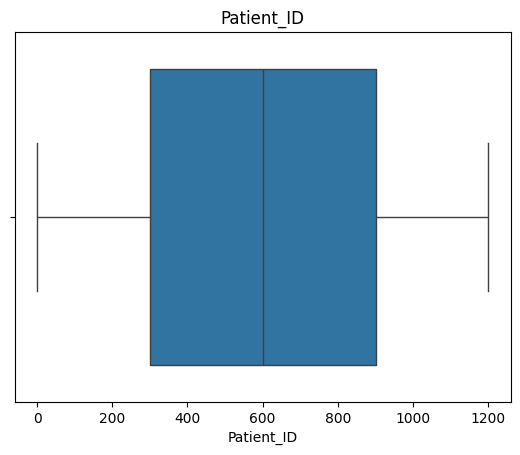

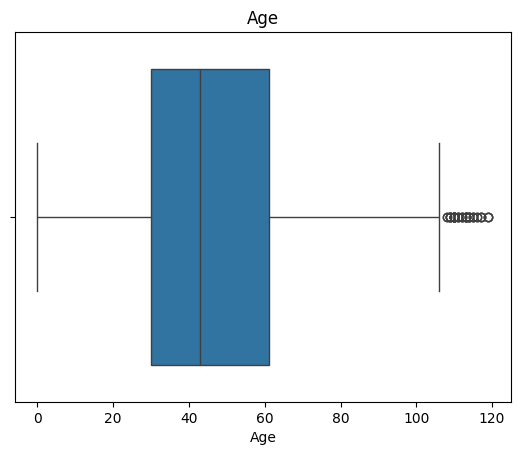

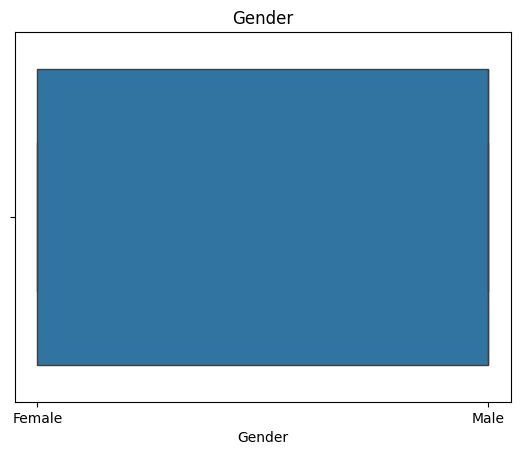

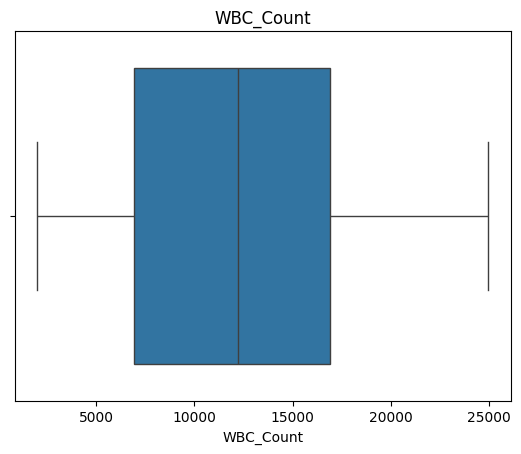

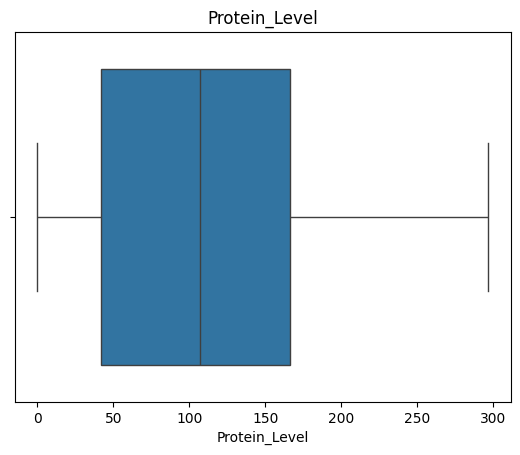

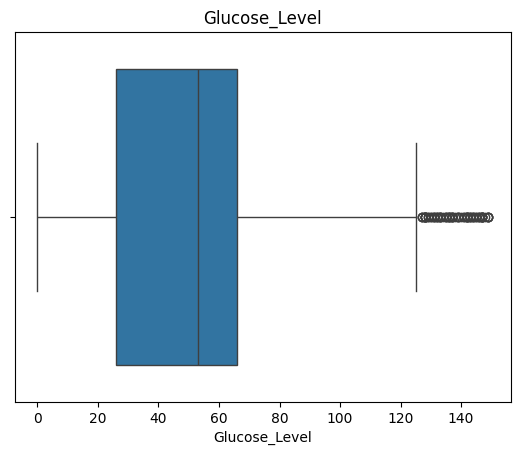

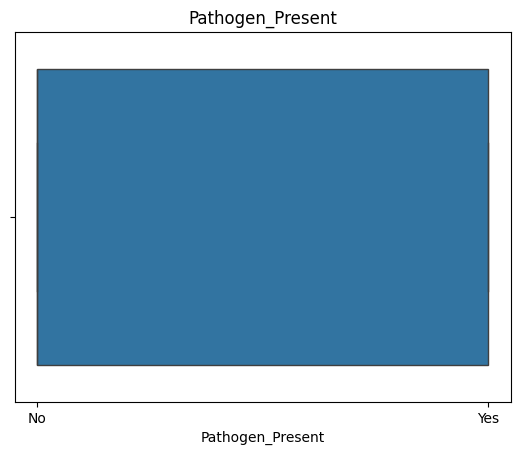

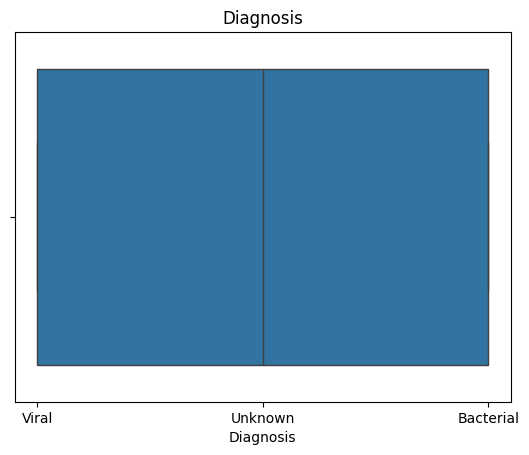

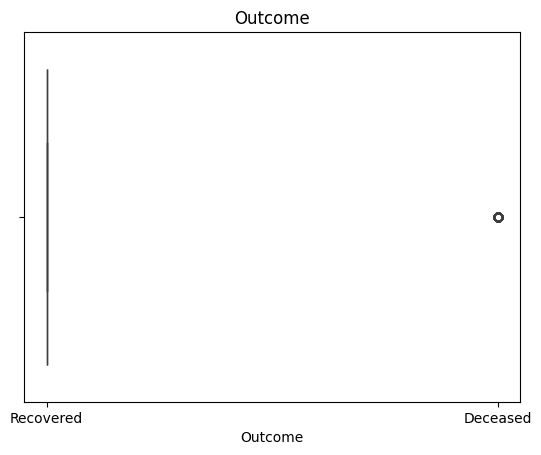

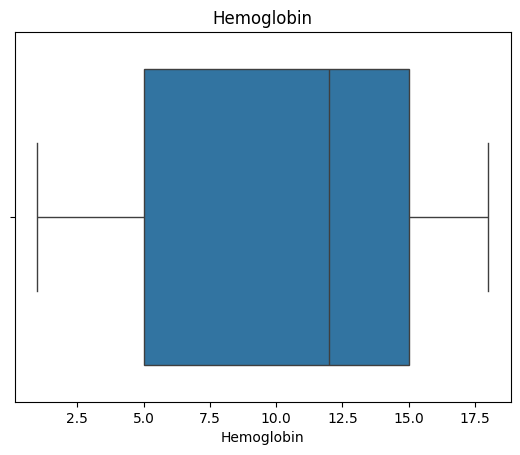

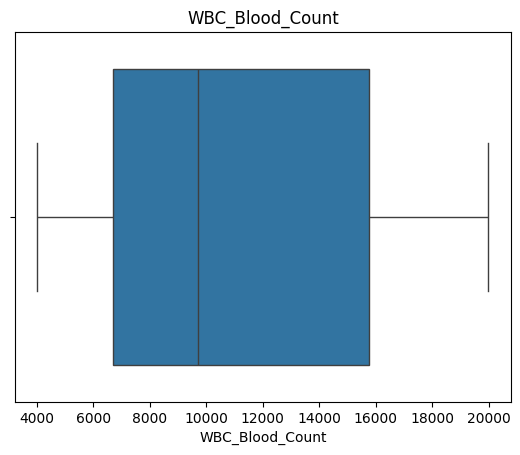

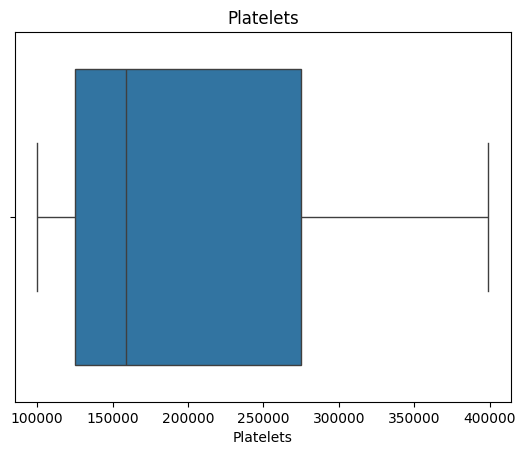

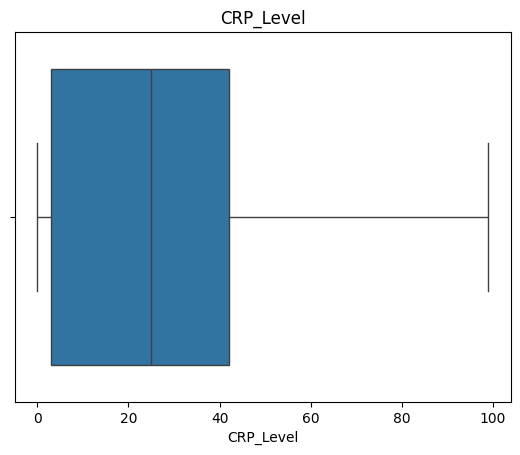

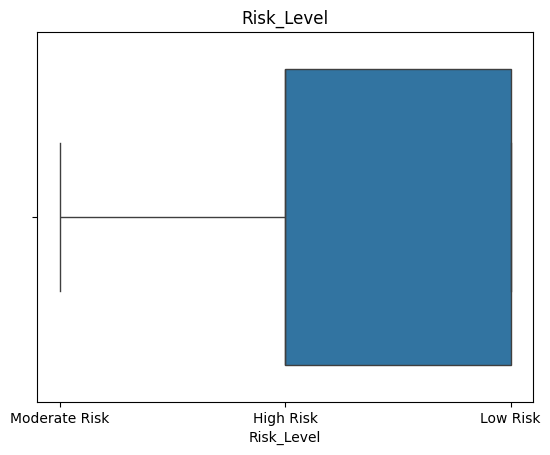

In [25]:


for i in df.columns:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()





In [31]:
#age # glucose level
#solving outlierss with iqr
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)

iqr=q3-q1
lowerb=q1-1.5*iqr
upperb=q3+1.5*iqr

#now removing out by replacing with mean
df.loc[(df['Age']<lowerb) | (df['Age']>upperb),'Age']=df['Age'].mean()




In [32]:
q1=df['Glucose_Level'].quantile(0.25)
q3=df['Glucose_Level'].quantile(0.75)

iqr=q3-q1
lowerb=q1-1.5*iqr
upperb=q3+1.5*iqr

#now removing out by replacing with mean
df.loc[(df['Glucose_Level']<lowerb) | (df['Glucose_Level']>upperb),'Glucose_Level']=df['Glucose_Level'].mean()

In [37]:
y=df[[
    'Glucose_Level']]

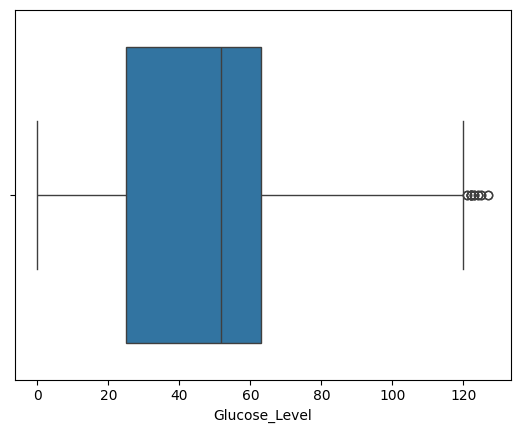

In [38]:
for i in y.columns:
  sns.boxplot(x=y[i])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        1157 non-null   object
 1   Age               1157 non-null   object
 2   Gender            1157 non-null   object
 3   WBC_Count         1157 non-null   object
 4   Protein_Level     1157 non-null   object
 5   Glucose_Level     1157 non-null   object
 6   Pathogen_Present  1157 non-null   object
 7   Diagnosis         1157 non-null   object
 8   Outcome           1157 non-null   object
 9   Hemoglobin        1157 non-null   object
 10  WBC_Blood_Count   1157 non-null   object
 11  Platelets         1157 non-null   object
 12  CRP_Level         1157 non-null   object
 13  Risk_Level        1157 non-null   object
dtypes: object(14)
memory usage: 135.6+ KB


In [46]:
df.sample(500)

,Patient_ID,Age,Gender,WBC_Count,Protein_Level,Glucose_Level,Pathogen_Present,Diagnosis,Outcome,Hemoglobin,WBC_Blood_Count,Platelets,CRP_Level,Risk_Level
507,508,72.0,Female,6306.0,70.0,65.0,Yes,Viral,Recovered,5.0,13485.0,121247.0,73.0,High Risk
689,690,40.0,Male,13486.0,295.0,51.692308,Yes,Viral,Recovered,2.0,17583.0,104675.0,73.0,Low Risk
1057,1058,95.0,Male,12747.0,263.0,58.0,No,Bacterial,Recovered,16.0,9534.0,313917.0,58.0,Low Risk
601,602,62.0,Female,16773.0,139.0,33.0,Yes,Bacterial,Recovered,4.0,12830.0,116323.0,28.0,High Risk
1136,1137,31.0,Male,5614.0,52.0,65.0,No,Viral,Recovered,17.0,4664.0,317117.0,0.0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,765,33.0,Male,15639.0,193.0,18.0,Yes,Bacterial,Recovered,3.0,19820.0,121662.0,28.0,High Risk
264,265,68.0,Female,10309.0,108.0,43.0,Yes,Viral,Recovered,3.0,14703.0,134968.0,33.0,Low Risk
845,846,26.0,Female,6330.0,52.0,61.0,No,Viral,Recovered,13.0,8970.0,346321.0,0.0,Low Risk
670,671,67.0,Male,19039.0,102.0,16.0,Yes,Bacterial,Recovered,8.0,15941.0,100480.0,40.0,High Risk
